<div style="text-align: center;">
    <h1> Interpolasi </h1>
        <img src="images/Linear_Int.gif" alt="Interpolasi Linear" width="350"/>
    <img src="images/Lagrange_Int.gif" alt="Interpolasi Lagrange" width="350"/>
</div>

Interpolasi merupakan metode matematis dalam memperkirakan nilai di antara titik-titik data yang diketahui. Namun, perlu diperhatikan bahwa Interpolasi sangatlah berbeda dengan Regresi walaupun secara sekilas keduanya sama-sama digunakan untuk memprediksi variabel.

## Interpolasi vs Regresi

| Aspek                  | Interpolasi                          | Regresi                     |
|------------------------|----------------------------------|---------------------------------|
| Tujuan | Memperkirakan nilai eksak dari titik-titik data yang diketahui| Menemukan hubungan antara variabel guna memahami pola data.
| Karakteristik Garis | Garis interpolasi melewati seluruh titik data. | Garis regresi tidak perlu melewati seluruh titik data.
|Sifat Model | Interpolasi tidak dapat digunakan untuk memprediksi nilai di luar titik data | Dapat digunakan untuk melakukan prediksi nilai output berdasarkan hubungan antara variabel.
|Contoh Kasus | Pengukuran kecepatan gerak benda di antara dua pengukuran kecepatan yang telah diketahui.   | Prediksi hubungan harga rumah berdasarkan luas, lokasi, dan fitur lainnya.





Terdapat banyak sekali metode yang dapat kita gunakan untuk melakukan interpolasi. Namun, pada course kali ini, kita akan bekerja dengan dua metode interpolasi, Interpolasi Linear dan Interpolasi Lagrange

## Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

## Persiapan Data

## Interpolasi Linear

Dalam interpolasi linear, kita memperkirakan nilai dengan menghubungkan dua titik data dengan garis lurus menggunakan persamaan linear.

<div style="text-align: center;">
        <img src="images/1.jpg" alt="Linear1 " width="500"/>
</div>

Pada gambar di atas, nilai $(x_t,y_t)$ didapatkan melalui interpolasi dari $(x_1,y_1)$ dan $(x_2,y_2)$. Hal ini dicapai melalui Hukum Kesebangunan sebagaimana yang telah kita pelajari pada course minggu sebelumnya. Nilai gradien antara titik $1$ dan $t$ dengan titik $1$ dan $2$ dapat dinyatakan sebagai berikut:

$$\frac{y_t-y_1}{x_t-x_1} = \frac{y_2-y_1}{x_2-x_1}$$

Dengan demikian:

$$y_t = \frac{y_2-y_1}{x_2-x_1}(x_t-x_1)+y_1$$

Sebelum kita mencoba membuat program dari fungsi di atas, kita perlu melihat bagaimana data interpolasi diberikan dalam course ini. Sebagai contoh diberikan data interpolasi sebagai berikut:

$$points = \{[x_1, y_1], [x_2,y_2]\} = \{[1, 3], [4,9]\}$$

Maka data $s$ akan dideklarasikan dalam bentuk ndarray sebagai
<div style="text-align: center;">
    <code>points = np.array([[1, 3], [4, 9]]) </code>
</div>
Untuk mendapatkan nilai sumbu $x$ dari kedua data, kita bisa menggunakan *array slicing* sebagaimana yang terdapat dalam materi *Preliminaries* sebagai berikut:

<div style="text-align: center;">
    <code> points_x = points[:,0] </code>
</div>

Slicing di atas berarti seluruh elemen pada baris array $points$ pada kolom pertama.


In [2]:
points = np.array([[1,3],[4,9]])

#Lakukan slicing untuk data sumbu x
points_x = points[:,0]

#Lakukan slicing untuk data sumbu y
points_y = points[:,1]

print(f'Titik Data: \n {points}')
print(f'Titik Data X: {points_x}')
print(f'Titik Data Y: {points_y}')

Titik Data: 
 [[1 3]
 [4 9]]
Titik Data X: [1 4]
Titik Data Y: [3 9]


In [3]:
#Sementara itu, untuk menyusun data sebagaimana contoh data `points` di atas:

#Diberikan data x dan data y sebagai berikut:
points_x = np.array([1,3])
points_y = np.array([4,9])

#Gabungkan points_x dan points_y dengan:
points = np.c_[points_x, points_y]

print(f'Titik Data X: {points_x}')
print(f'Titik Data Y: {points_y}')
print(f'Titik Data: \n {points}')

Titik Data X: [1 3]
Titik Data Y: [4 9]
Titik Data: 
 [[1 4]
 [3 9]]


In [4]:
#Latihan 1
def linear_int(x, points):
    '''Interpolasi Linear titik x terhadap data yang telah diberikan
    Input:
        points (ndarray) -> array berdimensi 2x2 sebagai data interpolasi 
                            [[x1,y1], [x2,y2]]
        x (float) -> nilai x yang akan diinterpolasi terhadap data points
                    x1<=x<=x2
    Output:
        y (float) -> hasil interpolasi x'''
    
    x0, y0 = points[0]
    x1, y1 = points[1]
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)

In [5]:
utils.run_tests1(linear_int)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


Mari kita coba fungsi di atas

In [6]:
points = np.array([[1,3],[4,9]])
x = 2
y = linear_int(x, points)
print(f'Hasil Interpolasi dari titik {x} ialah {y}')

Hasil Interpolasi dari titik 2 ialah 5.0


Kita bisa membuat garis interpolasi dari kedua titik di atas sebagai berikut:

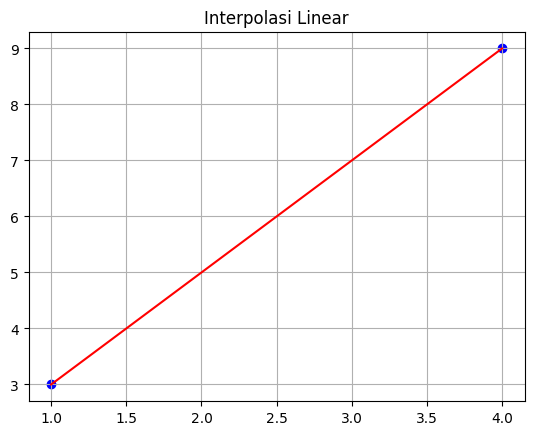

In [7]:
points = np.array([[1,3],[4,9]])
points_x = points[:,0] #ambil titik x
points_y = points[:,1] #ambil titik y

#tarik garis dari nilai x minimum ke nilai x maksimum
x = np.linspace(points_x.min(), points_x.max(), 10) 

#gunakan sifat broadcasting array dari numpy untuk mendapatkan nilai interpolasi
y = linear_int(x, points)

#plot garis nilai hasil interpolasi y:
plt.plot(x,y, color = 'red')
plt.scatter(points_x, points_y, color = 'blue')
plt.grid()
plt.title('Interpolasi Linear')
plt.show()

## Interpolasi Piecewise Linear

Interpolasi Piecewise linear merupakan metode interpolasi suatu fungsi menggunakan serangkaian garis linear yang menghubungkan titik-titik data. 

Sebagai contoh, pada gambar di bawah kita mencoba melakukan interpolasi fungsi kuadrat menggunakan 10 titik yang dihubungkan menggunakan interpolasi linear. Dapat dilihat bahwa hasil yang didapatkan dari interpolasi ini tidaklah kontinu dan hasil yang didapatkan masih kasar. Akan tetapi, jika kita menambahkan titik data observasi, hasil interpolasi piecewise akan lebih halus.

<div style="text-align: center;">
        <img src="images/2.gif" alt="Piecewise2 " width="500"/>
</div>

Dalam Interpolasi Linear Piecewise, hal yang perlu kita lakukan ialah:
1. Tentukan dua titik acuan terdekat ($X_A$ dan $X_B$) (dalam hal ini kita mengambil dua titik paling kiri terlebih dahulu)
2. Ambil titik interpolasi $X_I$ di antara titik ($X_A$ dan $X_B$)
3. Lakukan interpolasi titik $X_I$ sehingga membentuk garis antara kedua titik acuan
4. Geser titik acuan dan lakukan interpolasi untuk titik interpolasi di antara titik acuan
5. Ulangi langkah-langkah sebelumnya hingga dicapai titik terakhir

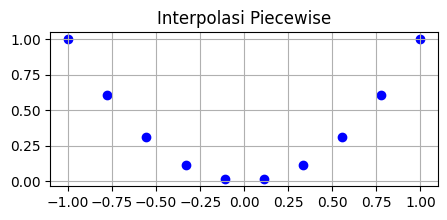

In [8]:
#Mari kita lihat bentuk data yang akan kita kerjakan
points = utils.piecewise_data
points_x = points[:,0] #ambil titik x
points_y = points[:,1] #ambil titik y

#Plot titik-titik data
plt.figure(figsize = (5,2))
plt.scatter(points_x, points_y, color = 'blue')
plt.grid()
plt.title('Interpolasi Piecewise')
plt.show()

#Nilai x untuk Interpolasi Piecewise merupakan array yg ditarik dari points_x terkecil ke points_x terbesar
x_array = np.linspace(points_x.min(), points_x.max(), 100) 

In [12]:
#latihan 2
def piecewise_lin(x_array, points):
    '''
    Menentukan hasil Interpolasi Piecewise berdasarkan titik-titik points
    Input:
        points: data titik-titik interpolasi berdimensi nx2
        x_array: array titik-titik x yang ditarik dari data points sumbu x terkecil ke terbesar
    Output:
        y_array: array titik-titik y hasil interpolasi
    '''
    y_array = []
    index = 1
    for x in x_array:
        if x > points[index, 0]:
            index += 1
            
        y = linear_int(x, points[index-1:index+1])
        y_array.append(y)

    return y_array

In [13]:
utils.run_tests2(piecewise_lin)

.
----------------------------------------------------------------------
Ran 1 test in 0.060s

OK


Mari kita coba fungsi di atas

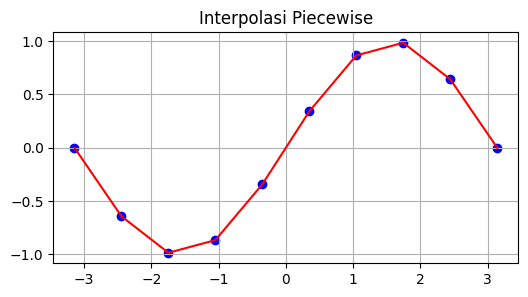

In [19]:
#Interpolasikan titik random yang menyerupai grafik sinusoidal
points = utils.generate_points(np.sin, num = 10, left_bound = -np.pi, right_bound = np.pi)

points_x = points[:,0] #ambil titik x
points_y = points[:,1] #ambil titik y

#Nilai x untuk Interpolasi Piecewise merupakan array yg ditarik dari points_x terkecil ke points_x terbesar
x_array = np.linspace(points_x.min(), points_x.max(), 100) 

#Interpolasikan x_array
y_array = piecewise_lin(x_array, points)

#Plot titik-titik data
plt.figure(figsize = (6,3))
plt.scatter(points_x, points_y, color = 'blue')
plt.plot(x_array, y_array, color = 'red')
plt.grid()
plt.title('Interpolasi Piecewise')
plt.show()

Jika hasil interpolasi piecewise masih terlalu kasar, silakan tingkatkan parameter `num` pada fungsi `generate_points`!

## Interpolasi Lagrange

Interpolasi Lagrange merupakan metode interpolasi yang digunakan untuk menemukan polinom dari sekumpulan titik data. Hal ini berbeda dari interpolasi sebelumnya yang menggunakan garis linear. Jika kita diberikan data sejumlah $n+1$ titik, maka interpolasi Lagrange memberikan polinom berderajat $n$. Pada gambar berikut, diberikan contoh dari Interpolasi Lagrange dalam mendekati fungsi sinusoidal.

<div style="text-align: center;">
    <img src="images/Lagrange_Int.gif" alt="Interpolasi Lagrange" width="500"/>
</div>

Interpolasi Lagrange dirumuskan sebagai:

$$P(x) = \sum^n_{i=0} y_i L_i(x)$$

dengan $L_i$ menyatakan polinom lagrange yang dinyatakan sebagai:

$$L_i(x) = \prod_{\substack{0 \le j \le n \\ j \ne i}}^n \frac{x - x_j}{x_i - x_j}$$

Sebagai contoh, diberikan data $\{(x_1,y_1),(x_2,y_2),(x_3,y_3)\}$.
$L_1(x)$ didefinisikan sebagai:

$$L_1(x) = \frac{x-x_2}{x_1-x_2} \times \frac{x-x_3}{x_1-x_3}$$

Dengan menyelesaikan nilai $L_2$ dan $L_3$, kita mendapatkan:
$$P(x) = y_1L_1(x) + y_2L_2(x) + y_3L_3(x)$$

Kita dapat menyelesaikan persamaan ini lebih mudah dengan menggunakan program loop.

In [1]:
import numpy as np
import utils

In [2]:
#Latihan 3
def lagrange_int(x,points):
    '''
    Menentukan hasil Interpolasi Lagrange berdasarkan titik-titik points
    Input:
        points: data titik-titik interpolasi berdimensi nx2
        x (float) -> nilai x yang akan diinterpolasi terhadap data points
    Output:
        y (float) -> hasil interpolasi x
    '''
    result = 0
    n = len(points)-1
    for i in range(0,n+1):
        lagrange_val = 1
        for j in range(0,n+1):
            if not i == j:
                lagrange_val*= ((x-points[j][0])/(points[i][0]-points[j][0]))
        result += lagrange_val*points[i][-1]
    return result

In [3]:
utils.run_tests3(lagrange_int)

..F
FAIL: test_case_3 (utils.TestLagrangeInt)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/andikoputrapk/skin/lib/python3.10/site-packages/timeout_decorator/timeout_decorator.py", line 82, in new_function
    return function(*args, **kwargs)
  File "/home/andikoputrapk/FisikaKomputasi/W4-Interpolation/utils.py", line 112, in test_case_3
    self.assertAlmostEqual(result, expected_result, delta = 1e-3)
AssertionError: 0.36332946492984847 != 0.28366218546322625 within 0.001 delta (0.07966727946662222 difference)

----------------------------------------------------------------------
Ran 3 tests in 0.003s

FAILED (failures=1)


Mari kita coba fungsi di atas

In [24]:
#Interpolasikan titik random yang menyerupai grafik sinusoidal
points = utils.generate_points(np.sin, num = 11, left_bound = -np.pi, right_bound = np.pi)
x = 2
y = lagrange_int(x, points)
print(f'Hasil Interpolasi Lagrange dari titik {x} ialah {y:.2f}')

Hasil Interpolasi Lagrange dari titik 2 ialah 0.91


Selain itu, mari kita coba buat grafik hasil interpolasi

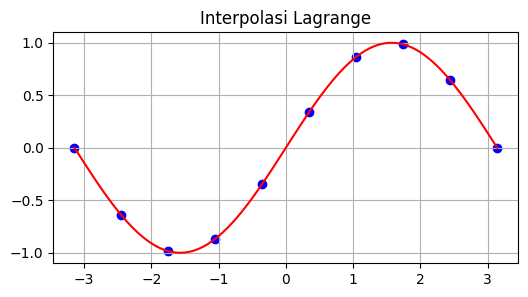

In [29]:
#Interpolasikan titik random yang menyerupai grafik sinusoidal
points = utils.generate_points(np.sin, num = 10, left_bound = -np.pi, right_bound = np.pi)
points_x = points[:,0] #ambil titik x
points_y = points[:,1] #ambil titik y

#tarik garis dari nilai x minimum ke nilai x maksimum
x = np.linspace(points_x.min(), points_x.max(), 100) 

#gunakan sifat broadcasting array dari numpy untuk mendapatkan nilai interpolasi
y = lagrange_int(x, points)

#plot garis nilai hasil interpolasi y:
plt.figure(figsize = (6,3))
plt.plot(x,y, color = 'red')
plt.scatter(points_x, points_y, color = 'blue')
plt.grid()
plt.title('Interpolasi Lagrange')
plt.show()

Anda dapat bereksperimen dengan data titik interpolasi atau fungsi yang berbeda!